In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [205]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]

In [206]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


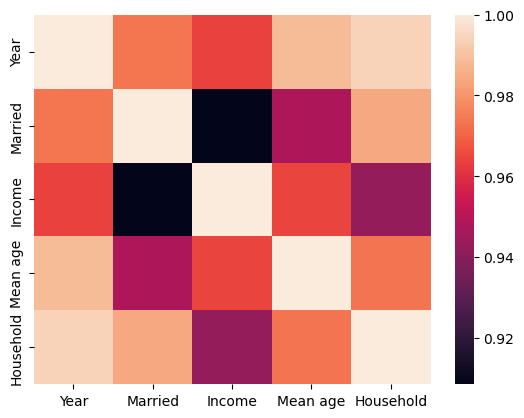

In [207]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [208]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

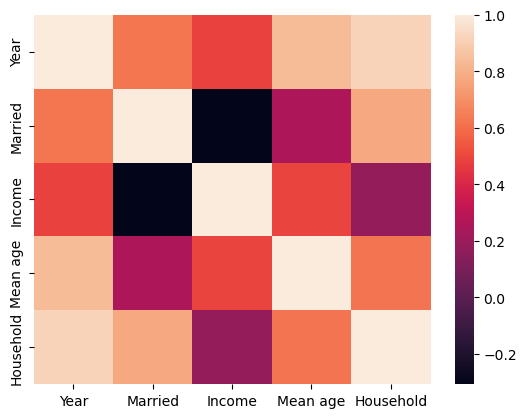

In [209]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [210]:
new

,Year,Married,Income,Mean age,Household
Year,1.000000,0.973903,0.964185,0.988373,0.993961
Married,0.973903,1.000000,0.908483,0.947680,0.984306
Income,0.964185,0.908483,1.000000,0.964535,0.942613
Mean age,0.988373,0.947680,0.964535,1.000000,0.973480
Household,0.993961,0.984306,0.942613,0.973480,1.000000


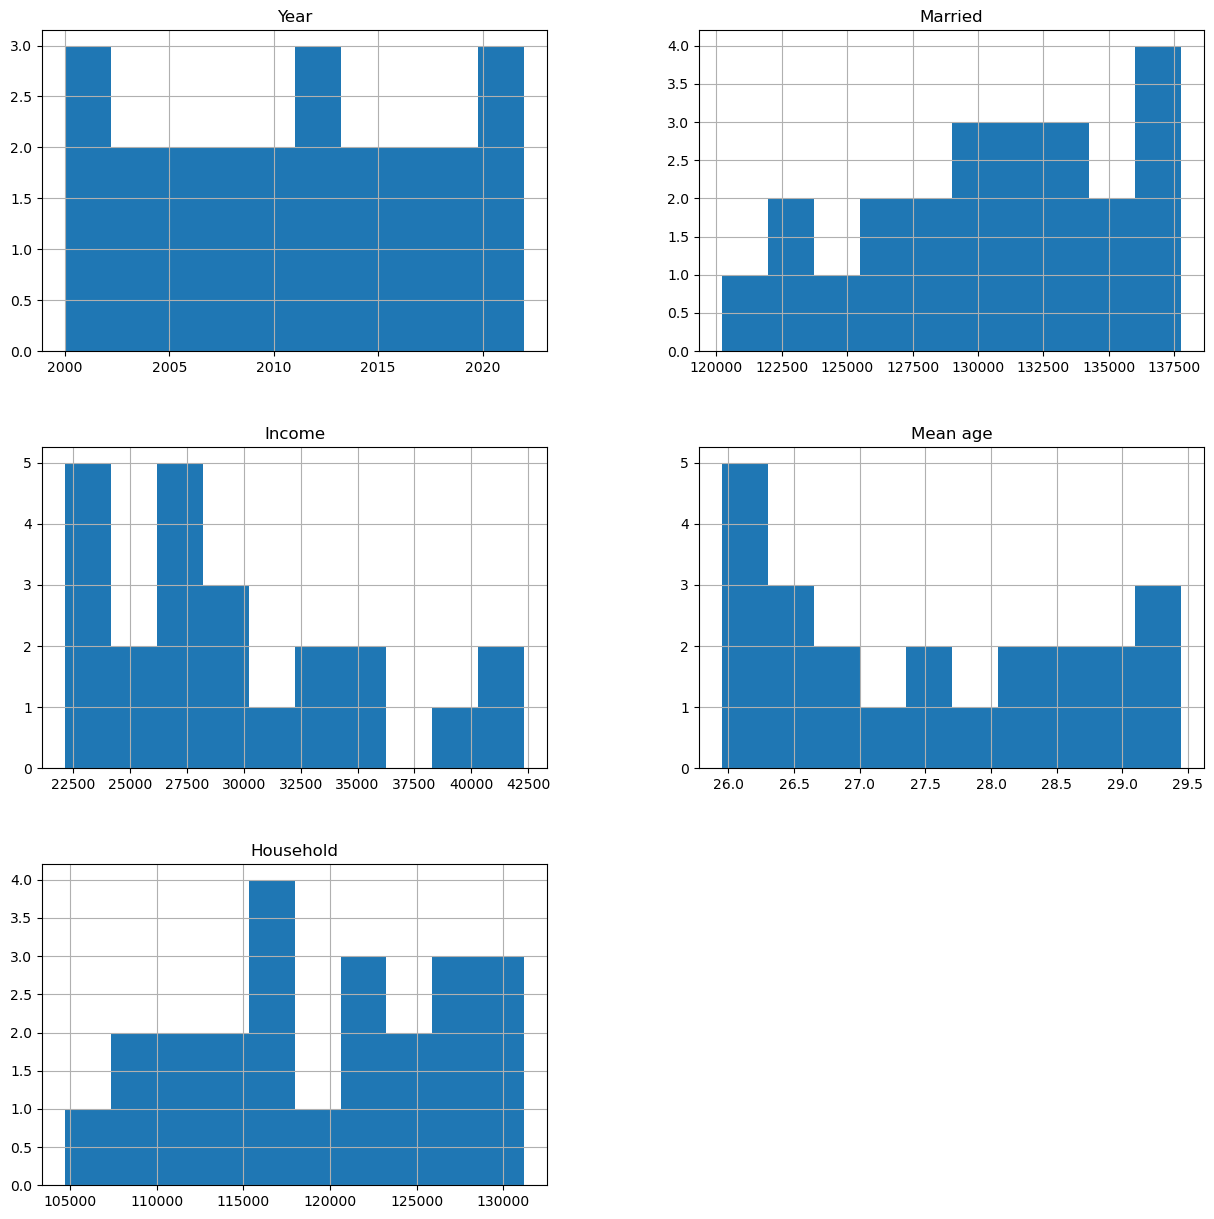

In [211]:

df.hist(figsize=(15,15), bins=10)
plt.show()

# Income na małżeństwa

In [212]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [213]:
model = CmdStanModel(stan_file='model_1_prior.stan')
N = 23
R=100

In [214]:
data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

20:27:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


20:27:44 - cmdstanpy - INFO - CmdStan done processing.


In [215]:
gen_1.draws_pd()

,lp__,accept_stat__,theta,alpha,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.000227,2.07772,119312.0,85955.0,52930.0,26541.0,21067.0,18251.0,...,3118.0,3403.0,3255.0,3027.0,2178.0,1649.0,1487.0,1362.0,1382.0,1224.0
1,0.0,0.0,0.000196,2.07435,32281.0,24071.0,16040.0,8935.0,7083.0,6345.0,...,1386.0,1420.0,1458.0,1329.0,1036.0,855.0,711.0,688.0,690.0,618.0
2,0.0,0.0,0.000197,1.96889,29246.0,21983.0,14783.0,8085.0,6429.0,5735.0,...,1269.0,1320.0,1298.0,1235.0,920.0,756.0,619.0,572.0,633.0,574.0
3,0.0,0.0,0.000201,2.06392,39123.0,29265.0,19260.0,10211.0,8274.0,7530.0,...,1603.0,1712.0,1571.0,1527.0,1096.0,905.0,799.0,763.0,704.0,711.0
4,0.0,0.0,0.000210,1.95101,51400.0,37305.0,24336.0,12823.0,10132.0,9024.0,...,1803.0,1851.0,1824.0,1613.0,1292.0,989.0,890.0,816.0,875.0,688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.000204,2.25134,53751.0,39777.0,25973.0,13881.0,11206.0,9886.0,...,2065.0,2187.0,2100.0,1880.0,1446.0,1137.0,987.0,916.0,942.0,922.0
96,0.0,0.0,0.000196,2.08866,32585.0,24334.0,16080.0,8780.0,7206.0,6416.0,...,1350.0,1504.0,1447.0,1359.0,1003.0,854.0,695.0,669.0,715.0,604.0
97,0.0,0.0,0.000203,2.03657,40845.0,30196.0,19771.0,10641.0,8557.0,7610.0,...,1543.0,1633.0,1634.0,1509.0,1143.0,938.0,863.0,744.0,745.0,677.0
98,0.0,0.0,0.000225,2.07447,109418.0,79427.0,49165.0,24436.0,19380.0,17154.0,...,2856.0,3210.0,3052.0,2792.0,2136.0,1599.0,1431.0,1321.0,1268.0,1175.0


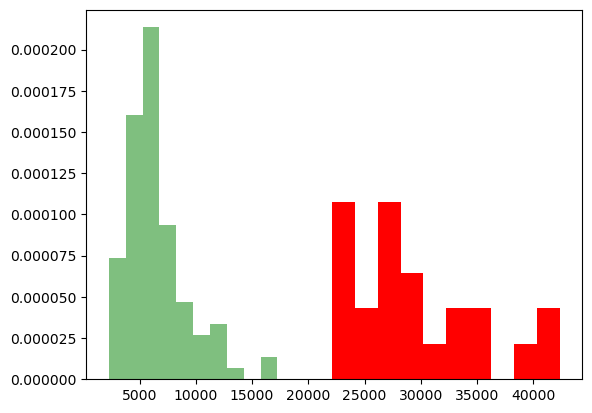

In [216]:
plt.hist(df['Income'], bins=10, color='red', density=True)
plt.hist(gen_1.y_sim.mean(1), bins=10, color='green', alpha = 0.5, density=True)
plt.show()

In [217]:
post_model = CmdStanModel(stan_file='model_1_posterior.stan')

In [218]:
data_post = {'N': N, 'y': df['Income'].values, 'income': df['Income']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

20:27:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


20:27:46 - cmdstanpy - INFO - CmdStan done processing.
20:27:46 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 iterations at max treedepth (12.0%)
	Use function "diagnose()" to see further information.


In [219]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta,alpha,y_sim[1],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,5299930.0,0.999584,0.00001,9.0,691.0,0.0,-5299920.0,0.000312,-0.940955,212928.0,...,1448.0,1567.0,1409.0,1343.0,858.0,585.0,562.0,416.0,428.0,401.0
1,5299930.0,0.959857,0.00001,6.0,127.0,0.0,-5299930.0,0.000312,-0.940956,214018.0,...,1460.0,1546.0,1427.0,1337.0,912.0,641.0,507.0,443.0,480.0,376.0
2,5299930.0,0.994616,0.00001,5.0,35.0,0.0,-5299930.0,0.000312,-0.940956,213151.0,...,1385.0,1545.0,1516.0,1381.0,878.0,622.0,470.0,451.0,483.0,382.0
3,5299930.0,0.996123,0.00001,9.0,551.0,0.0,-5299930.0,0.000312,-0.940932,214521.0,...,1422.0,1519.0,1524.0,1281.0,927.0,609.0,482.0,442.0,466.0,400.0
4,5299930.0,0.906206,0.00001,2.0,3.0,0.0,-5299930.0,0.000312,-0.940932,213417.0,...,1447.0,1598.0,1464.0,1289.0,875.0,638.0,497.0,413.0,476.0,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5300080.0,0.904207,0.00001,1.0,3.0,0.0,-5300080.0,0.000312,-0.939964,214073.0,...,1379.0,1591.0,1466.0,1398.0,891.0,602.0,488.0,474.0,433.0,413.0
96,5300080.0,0.987737,0.00001,8.0,299.0,0.0,-5300080.0,0.000312,-0.939959,213079.0,...,1438.0,1529.0,1526.0,1294.0,852.0,587.0,476.0,447.0,472.0,419.0
97,5300080.0,0.987990,0.00001,8.0,283.0,0.0,-5300080.0,0.000312,-0.939967,213618.0,...,1419.0,1560.0,1557.0,1363.0,867.0,629.0,475.0,412.0,433.0,388.0
98,5300090.0,0.999652,0.00001,10.0,1023.0,0.0,-5300080.0,0.000312,-0.939926,213818.0,...,1418.0,1560.0,1440.0,1335.0,872.0,659.0,502.0,465.0,456.0,373.0


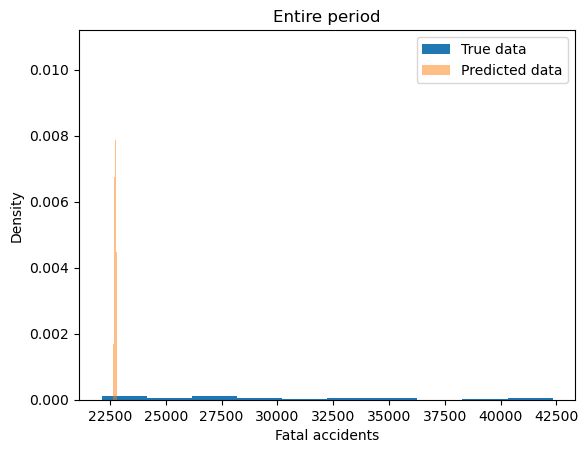

In [220]:
plt.hist(df['Income'], density=True, label= 'True data')
plt.hist(fit_1.y_sim.mean(1), alpha = 0.5, density=True, label ='Predicted data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Fatal accidents')
plt.legend()
plt.show()

In [ ]:
az.summary(fit_1)

In [ ]:
az.plot_posterior(fit_1)
plt.show()

# Income i Household na ilość małżeństw